In [ ]:
!pip install prophet

# IMPORT-EDA


In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.model_selection import TimeSeriesSplit
import pandas as pd
import numpy as np
from datetime import datetime
import requests
import warnings
import os

import matplotlib.pyplot as plt
import matplotlib
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

import seaborn as sns

from sklearn.preprocessing import StandardScaler
from prophet import Prophet
from prophet.plot import plot_plotly, add_changepoints_to_plot
from sklearn.metrics import mean_absolute_percentage_error


import statsmodels.api as sm

from tensorflow.keras.optimizers import Adam
import unicodedata
from datetime import timedelta

warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive

In [ ]:
# "dataset_combined" klasörüne git
#folder_path = "/Users/eyupburakatahanli/Desktop/Tubitak_Air_pol/dataset_combined"
folder_path = "/content/drive/MyDrive/dataset_combined"
os.chdir(folder_path)
dfs = {}
# tüm CSV dosyalarını al ve oku
for filename in os.listdir():
    if filename.endswith(".csv"):
        # dosya adından DataFrame adını ve dosya adını çıkart
        df_name = filename.split(".")[0].replace(" ", "")
        df = pd.read_csv(filename)
        exec(df_name + " = pd.DataFrame(df)") # DataFrame'i kaydet
        dfs[df_name] = df


In [ ]:
dfs

In [ ]:
def predict_an_ploting(ilce,param,sekil):
    """
    girilen ilçenin girilen parametresini 2022 yılı için haftalık tahminler. prophet kullanır.
    """

    ilce = unicodedata.normalize('NFKD', ilce)
    param = unicodedata.normalize('NFKD', param)
    dataset = dfs[ilce]
    dataset['ds'] = pd.to_datetime(dataset['ReadTime'], format='%Y-%m-%dT%H:%M:%S')
    dataset['y'] = dataset[param]
    dataset = dataset[['ds','y']]
    dataset.set_index('ds', inplace=True)
    dataset = dataset.resample('W').mean()

    start_date = '2022-01-09'
    train = dataset.loc[dataset.index < pd.to_datetime(start_date)].reset_index()
    test = dataset.loc[dataset.index >= pd.to_datetime(start_date)].reset_index()
    m = Prophet()
    m.fit(train)

    start_date = datetime(2022, 1, 9)
    end_date = datetime(2023, 1, 2)
    current_date = start_date
    time_intervals = []

    while current_date < end_date:
      time_intervals.append(current_date)
      current_date += timedelta(days=7)

    future = pd.DataFrame({'ds': time_intervals})
    forecast = m.predict(future)
    pred = forecast["yhat"]

    score = mean_absolute_percentage_error(test["y"], pred)
    print(score)

    fig, ax = plt.subplots(figsize=(8, 6))
    plt.suptitle(f"Şekil {sekil} {ilce} İstasyonu Model değerlendirme ({ilce} station model evaluation)")
    plt.plot(test["ds"].tail(52), test["y"].tail(52), label='Dataset')
    plt.plot(test["ds"], pred, label='Predicted')
    plt.xlabel("Tarih")
    plt.ylabel("Değer")
    plt.text(0.5, 0.95, f"MAPE: {score:2f}", ha='center', va='top', transform=plt.gca().transAxes)
    plt.legend()

    folder_path = '2022_değerlendirme_şekil'
    os.makedirs(folder_path, exist_ok=True)
    plt.savefig(os.path.join(folder_path, ilce+'.png'))
    plt.show()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyot4rvee/zadohdk4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpyot4rvee/90_25iuf.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29883', 'data', 'file=/tmp/tmpyot4rvee/zadohdk4.json', 'init=/tmp/tmpyot4rvee/90_25iuf.json', 'output', 'file=/tmp/tmpyot4rvee/prophet_model9dxa7p1r/prophet_model-20230720095552.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
09:55:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
09:55:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


0.213772231370222


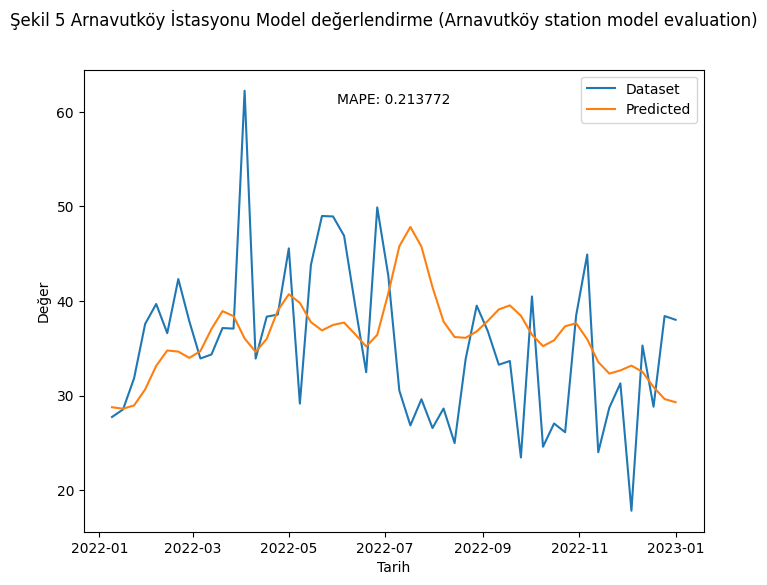

In [ ]:
 predict_an_ploting("Arnavutköy",param = "AQIINDEX_AQI", sekil = 5)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/ro0rrl5g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/v49z_x7i.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=77956', 'data', 'file=/tmp/tmprp53u2s9/ro0rrl5g.json', 'init=/tmp/tmprp53u2s9/v49z_x7i.json', 'output', 'file=/tmp/tmprp53u2s9/prophet_modelg0n_jvm0/prophet_model-20230719175551.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:55:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:55:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


0.213772231370222


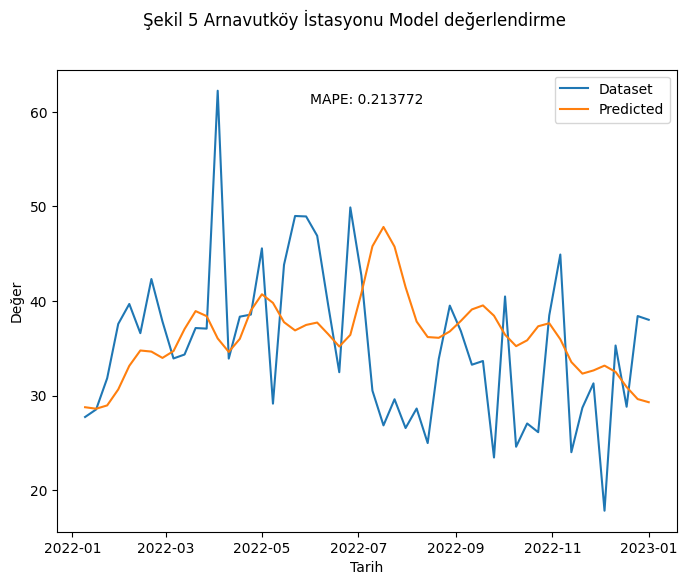

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/83xmy36_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/y22hdlnj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73251', 'data', 'file=/tmp/tmprp53u2s9/83xmy36_.json', 'init=/tmp/tmprp53u2s9/y22hdlnj.json', 'output', 'file=/tmp/tmprp53u2s9/prophet_model1c_5r7u_/prophet_model-20230719175552.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:55:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:55:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


0.22495325741220398


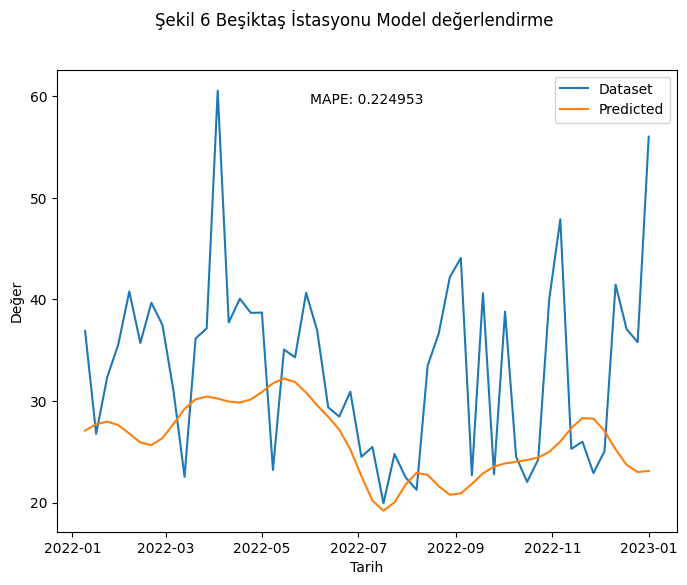

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/nbbz4z2f.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/gmqzarz7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70450', 'data', 'file=/tmp/tmprp53u2s9/nbbz4z2f.json', 'init=/tmp/tmprp53u2s9/gmqzarz7.json', 'output', 'file=/tmp/tmprp53u2s9/prophet_modelyeofs60l/prophet_model-20230719175553.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:55:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:55:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


0.21643218893253813


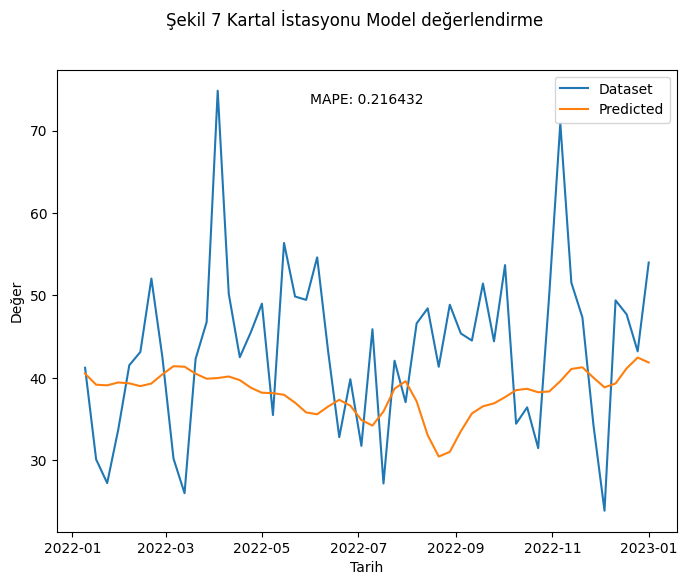

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/muhgnywq.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/r6cq_8gb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80467', 'data', 'file=/tmp/tmprp53u2s9/muhgnywq.json', 'init=/tmp/tmprp53u2s9/r6cq_8gb.json', 'output', 'file=/tmp/tmprp53u2s9/prophet_modelz4cvdpse/prophet_model-20230719175553.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:55:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:55:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


0.28136311020699156


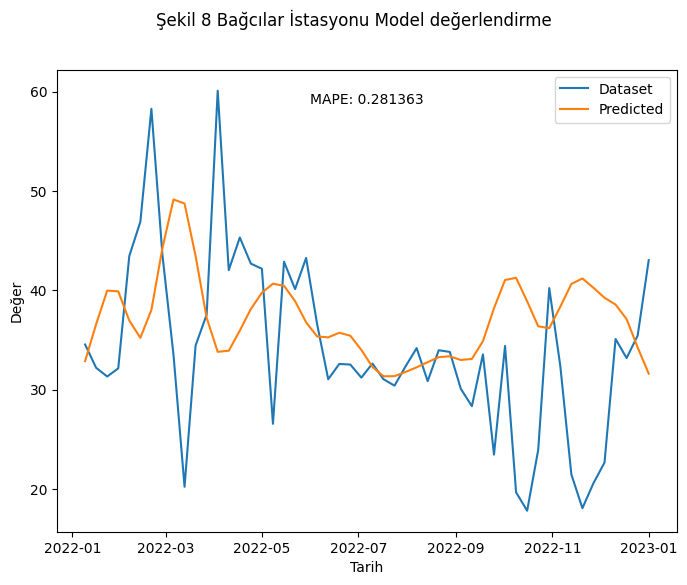

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/zh_7nw1i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/iu6hvckp.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=46844', 'data', 'file=/tmp/tmprp53u2s9/zh_7nw1i.json', 'init=/tmp/tmprp53u2s9/iu6hvckp.json', 'output', 'file=/tmp/tmprp53u2s9/prophet_modeli2cs7h_5/prophet_model-20230719175554.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:55:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:55:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


0.37558558210912296


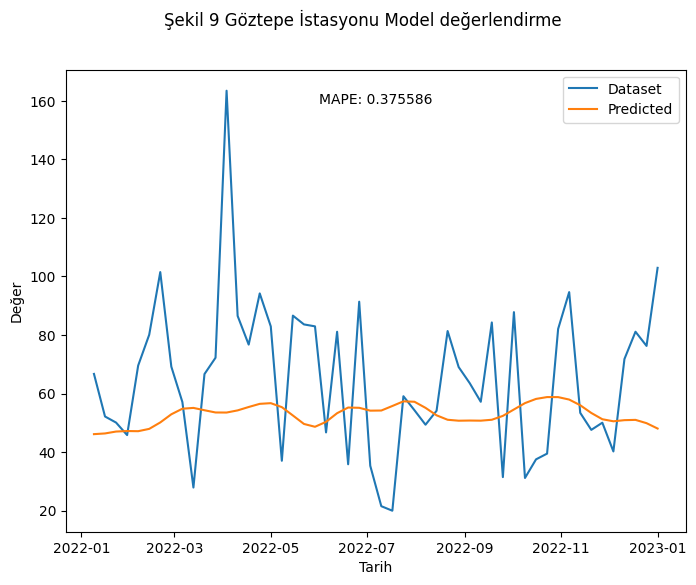

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/0ltc7joi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/t4roz8r6.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20012', 'data', 'file=/tmp/tmprp53u2s9/0ltc7joi.json', 'init=/tmp/tmprp53u2s9/t4roz8r6.json', 'output', 'file=/tmp/tmprp53u2s9/prophet_modellcct1oxs/prophet_model-20230719175555.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:55:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:55:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


0.24832216839610835


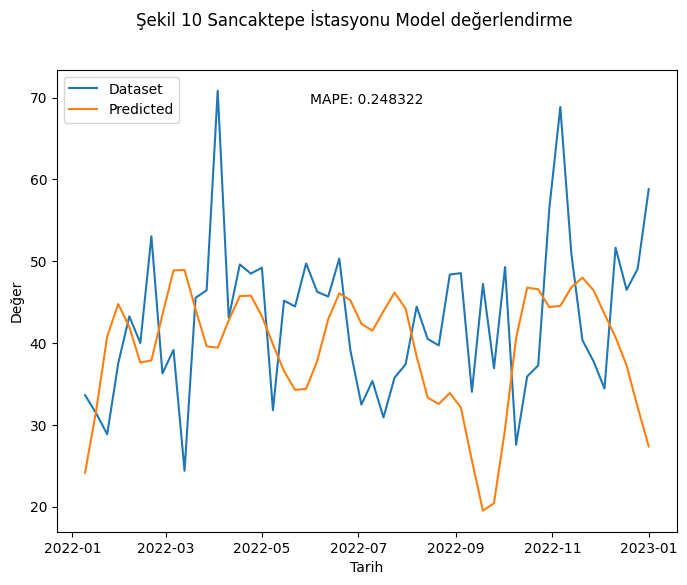

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/w3gen46j.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/x0qf064_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98556', 'data', 'file=/tmp/tmprp53u2s9/w3gen46j.json', 'init=/tmp/tmprp53u2s9/x0qf064_.json', 'output', 'file=/tmp/tmprp53u2s9/prophet_model5ch0w4lc/prophet_model-20230719175555.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:55:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:55:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


0.26086524195517


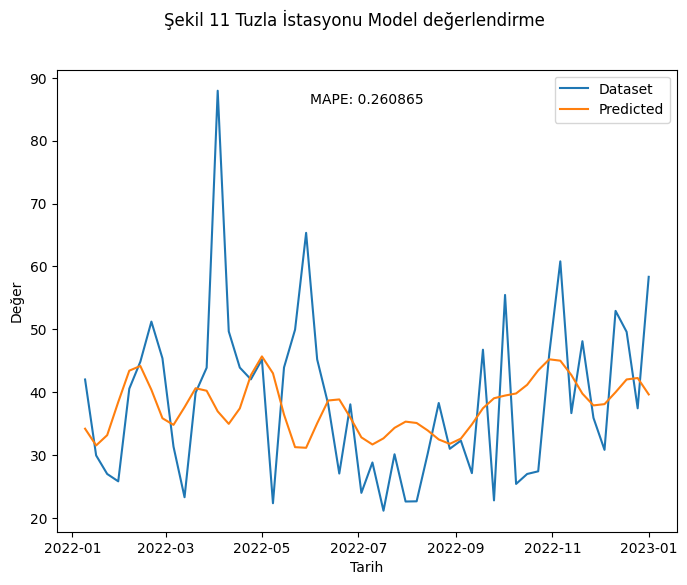

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/3wu1gzrv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/s6b4dfnj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87239', 'data', 'file=/tmp/tmprp53u2s9/3wu1gzrv.json', 'init=/tmp/tmprp53u2s9/s6b4dfnj.json', 'output', 'file=/tmp/tmprp53u2s9/prophet_modelmmal1uyz/prophet_model-20230719175556.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:55:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:55:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


0.30932902462359013


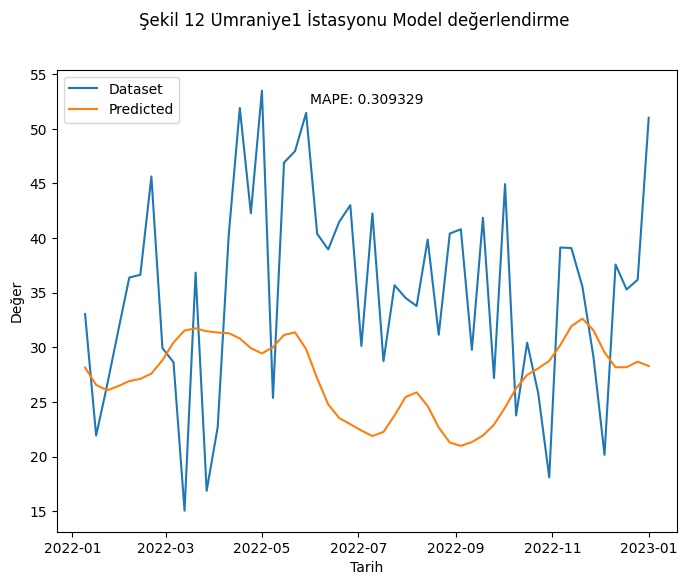

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/znvurkuj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/lppo5emo.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60494', 'data', 'file=/tmp/tmprp53u2s9/znvurkuj.json', 'init=/tmp/tmprp53u2s9/lppo5emo.json', 'output', 'file=/tmp/tmprp53u2s9/prophet_models1tb5b85/prophet_model-20230719175557.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:55:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:55:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonalit

0.239193975522258


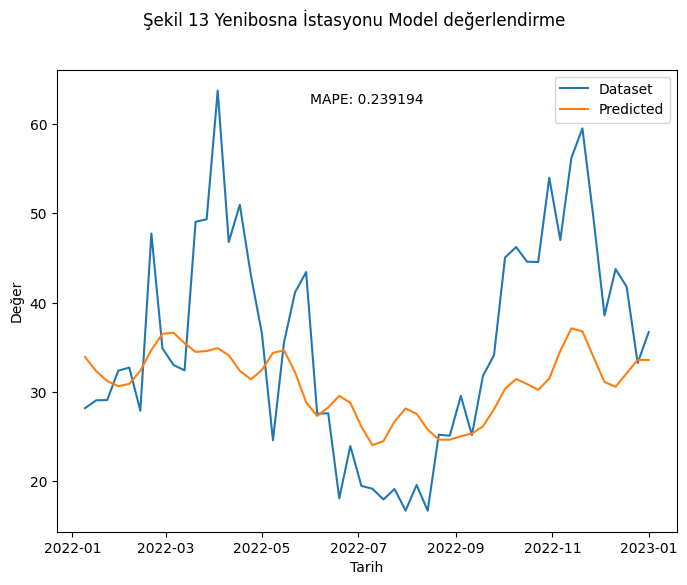

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/86kxnr7n.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/k4cwflw_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62517', 'data', 'file=/tmp/tmprp53u2s9/86kxnr7n.json', 'init=/tmp/tmprp53u2s9/k4cwflw_.json', 'output', 'file=/tmp/tmprp53u2s9/prophet_modelncdpmv_l/prophet_model-20230719175558.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:55:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:55:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


0.3236103244773849


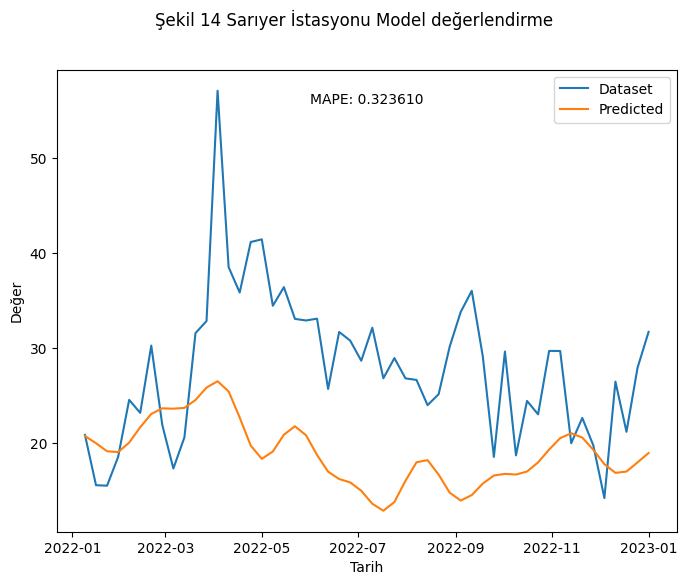

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/iepu67zw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/3lzhlz2q.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14796', 'data', 'file=/tmp/tmprp53u2s9/iepu67zw.json', 'init=/tmp/tmprp53u2s9/3lzhlz2q.json', 'output', 'file=/tmp/tmprp53u2s9/prophet_model_wqh8w4c/prophet_model-20230719175559.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:55:59 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:55:59 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


0.2265949651317382


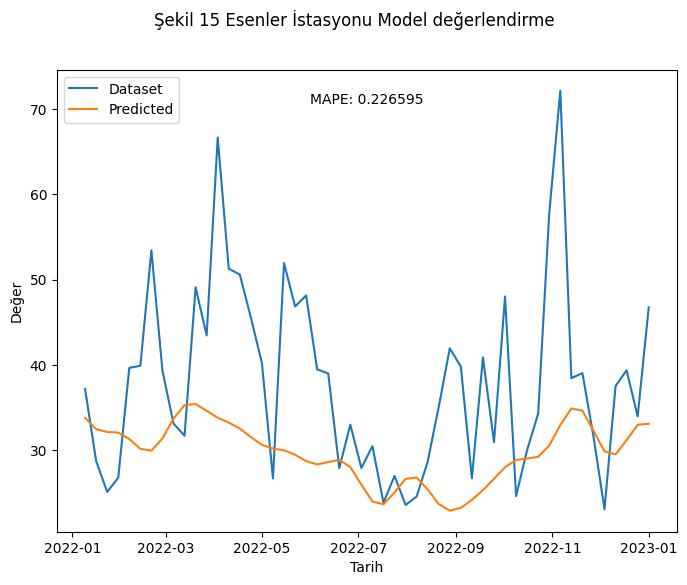

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/469mb94e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/78on21rm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=68796', 'data', 'file=/tmp/tmprp53u2s9/469mb94e.json', 'init=/tmp/tmprp53u2s9/78on21rm.json', 'output', 'file=/tmp/tmprp53u2s9/prophet_modelayowxh4s/prophet_model-20230719175600.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:56:00 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:56:01 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonalit

0.2512385962116705


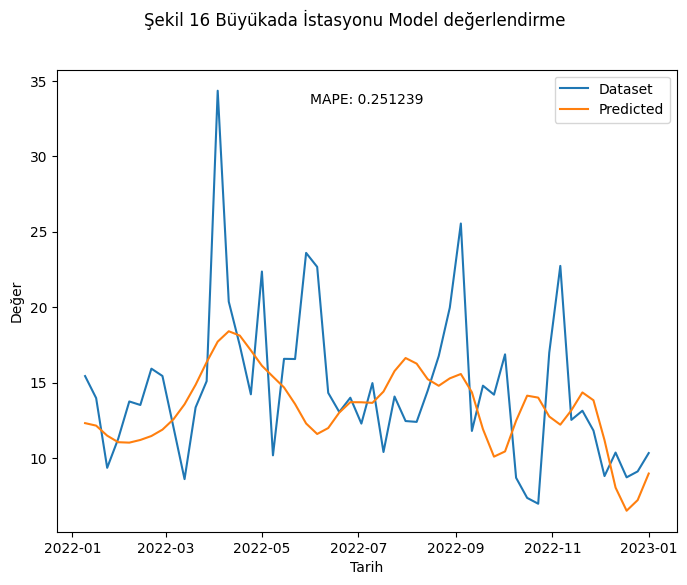

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/zzq7r8dp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/hunq9w0h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=71365', 'data', 'file=/tmp/tmprp53u2s9/zzq7r8dp.json', 'init=/tmp/tmprp53u2s9/hunq9w0h.json', 'output', 'file=/tmp/tmprp53u2s9/prophet_models150be5p/prophet_model-20230719175602.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:56:02 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:56:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


0.23894234461005487


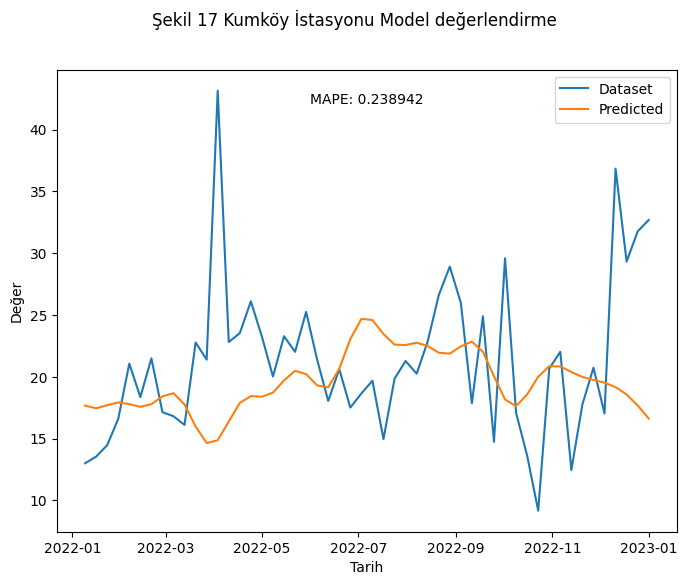

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/59i1ya0d.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/4l47sm1p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=73930', 'data', 'file=/tmp/tmprp53u2s9/59i1ya0d.json', 'init=/tmp/tmprp53u2s9/4l47sm1p.json', 'output', 'file=/tmp/tmprp53u2s9/prophet_model256gysez/prophet_model-20230719175603.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:56:03 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:56:03 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonalit

0.42231039913031804


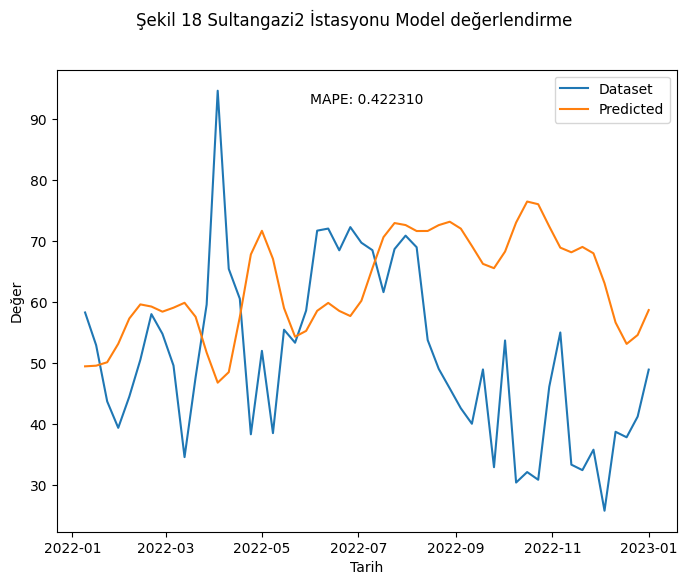

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/_bhzonia.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/rbife0ee.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50447', 'data', 'file=/tmp/tmprp53u2s9/_bhzonia.json', 'init=/tmp/tmprp53u2s9/rbife0ee.json', 'output', 'file=/tmp/tmprp53u2s9/prophet_modelff6dtrw6/prophet_model-20230719175605.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:56:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:56:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


0.529146886205027


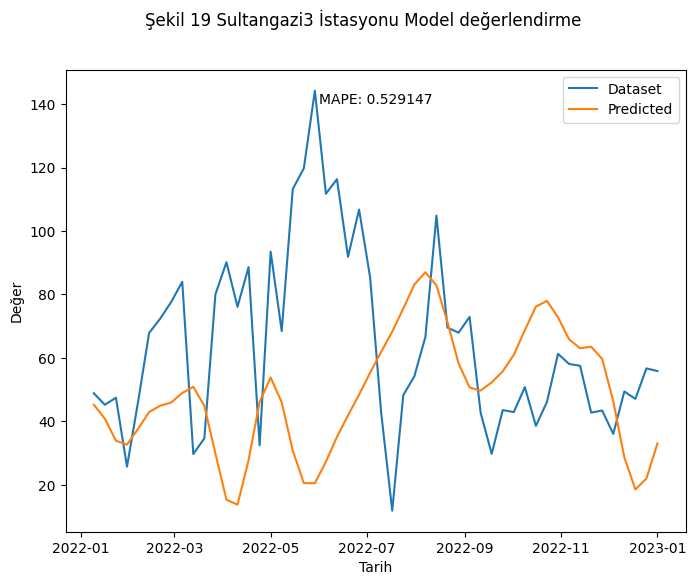

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/m8q35ecc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/xgnu2ibi.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94420', 'data', 'file=/tmp/tmprp53u2s9/m8q35ecc.json', 'init=/tmp/tmprp53u2s9/xgnu2ibi.json', 'output', 'file=/tmp/tmprp53u2s9/prophet_modelmq86iqyr/prophet_model-20230719175605.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:56:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:56:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


0.21299157171606142


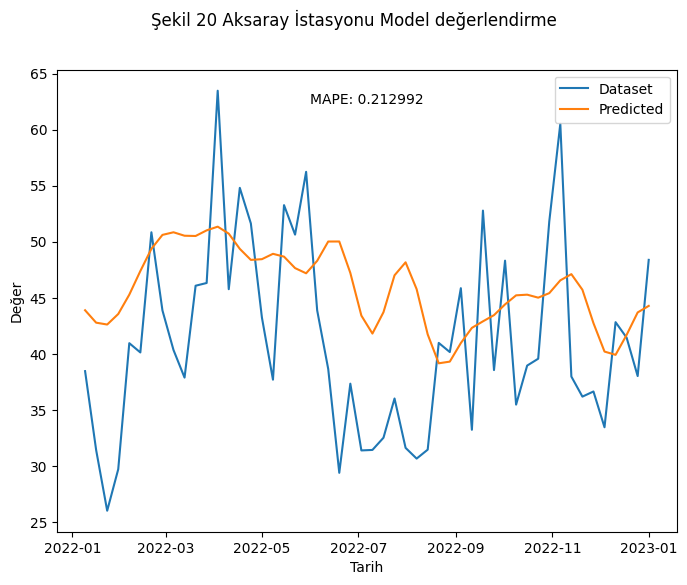

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/hdcr5djf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/athbvvfe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82825', 'data', 'file=/tmp/tmprp53u2s9/hdcr5djf.json', 'init=/tmp/tmprp53u2s9/athbvvfe.json', 'output', 'file=/tmp/tmprp53u2s9/prophet_modellqh7g5xj/prophet_model-20230719175606.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:56:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:56:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


0.42505639285949753


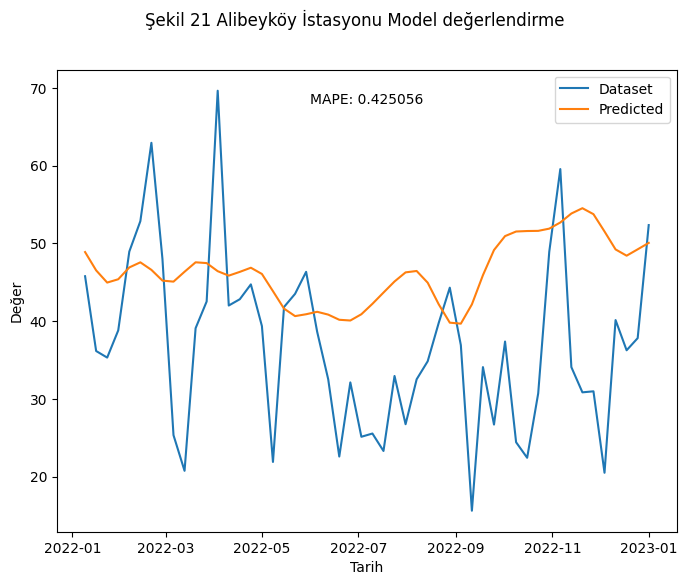

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/yl9unfig.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/mg__yu3e.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=84060', 'data', 'file=/tmp/tmprp53u2s9/yl9unfig.json', 'init=/tmp/tmprp53u2s9/mg__yu3e.json', 'output', 'file=/tmp/tmprp53u2s9/prophet_model698sksv3/prophet_model-20230719175607.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:56:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:56:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling weekly seasonalit

0.2159453470791002


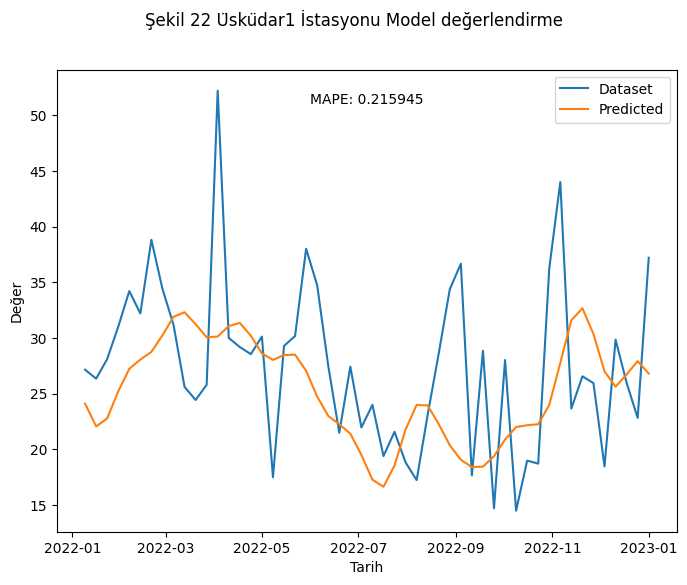

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/2u1yl1dr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/uhtsy2hj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=48493', 'data', 'file=/tmp/tmprp53u2s9/2u1yl1dr.json', 'init=/tmp/tmprp53u2s9/uhtsy2hj.json', 'output', 'file=/tmp/tmprp53u2s9/prophet_modelqiylrugj/prophet_model-20230719175608.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:56:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:56:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


0.30465236858853484


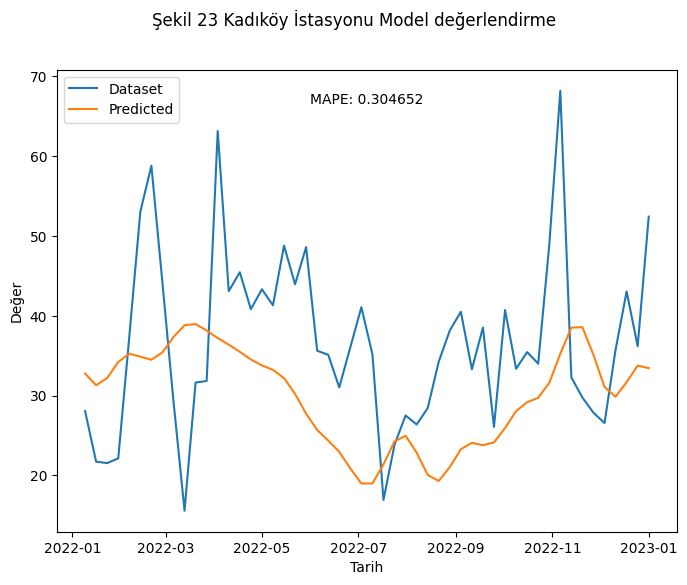

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/rytg9048.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/_cc4nzr0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=98622', 'data', 'file=/tmp/tmprp53u2s9/rytg9048.json', 'init=/tmp/tmprp53u2s9/_cc4nzr0.json', 'output', 'file=/tmp/tmprp53u2s9/prophet_modelj9hip2et/prophet_model-20230719175609.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:56:09 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:56:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


0.2738409789342834


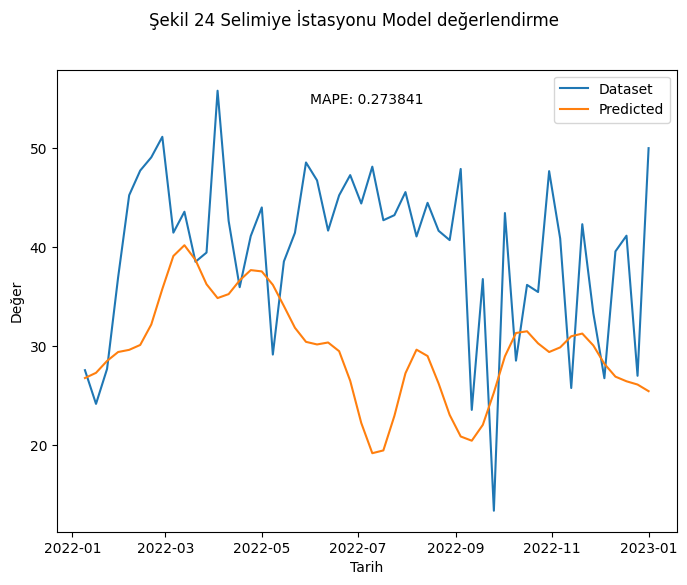

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/1laki4x6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/pgsov3lc.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=14152', 'data', 'file=/tmp/tmprp53u2s9/1laki4x6.json', 'init=/tmp/tmprp53u2s9/pgsov3lc.json', 'output', 'file=/tmp/tmprp53u2s9/prophet_modelefhzu1zi/prophet_model-20230719175610.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:56:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:56:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


1.1525545374965327


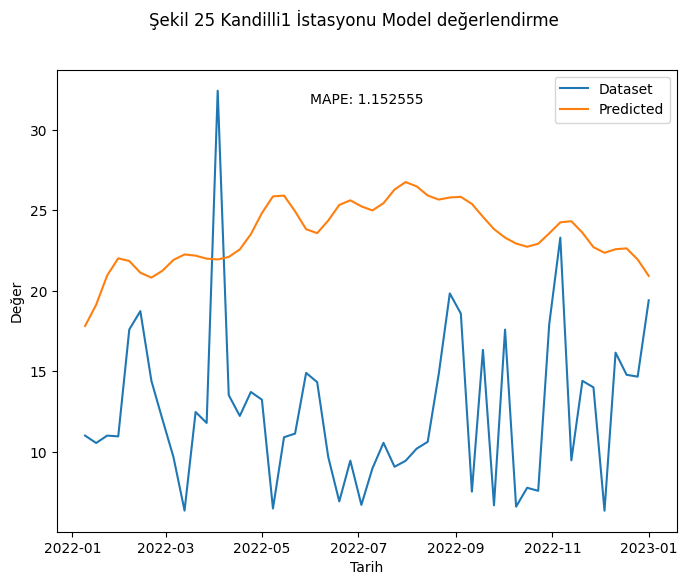

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/3nsfqqtc.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/qtmdc9j_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82117', 'data', 'file=/tmp/tmprp53u2s9/3nsfqqtc.json', 'init=/tmp/tmprp53u2s9/qtmdc9j_.json', 'output', 'file=/tmp/tmprp53u2s9/prophet_model2iu7u1wc/prophet_model-20230719175611.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:56:11 - cmdstanpy - INFO - Chai

0.3729572693932906


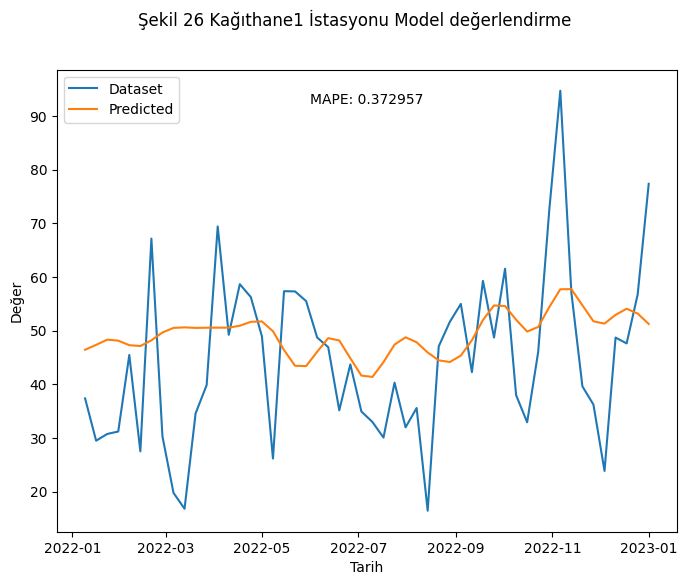

In [ ]:
#tüm istasyonlar için yapılan tahminleri görselleştirir ve klasöre kaydeder.
sekil = 5
for i in dfs.keys():
  try:
    predict_an_ploting(i,param = "AQIINDEX_AQI", sekil = sekil)
    sekil += 1
  except:
    pass


In [ ]:
predict_an_ploting("Kadıköy","AQIINDEX_AQI")

In [ ]:
def predict_future(ilce,param):
    """
    girilen ilçenin girilen parametresini 2023 yılı için haftalık tahminler. prophet kullanır.
    """

    ilce = unicodedata.normalize('NFKD', ilce)
    param = unicodedata.normalize('NFKD', param)
    dataset = dfs[ilce]
    dataset['ds'] = pd.to_datetime(dataset['ReadTime'], format='%Y-%m-%dT%H:%M:%S')
    dataset['y'] = dataset[param]
    dataset = dataset[['ds','y']]
    dataset.set_index('ds', inplace=True)
    dataset = dataset.resample('W').mean()
    dataset = dataset.reset_index()

    m = Prophet()
    m.fit(dataset)

    start_date = datetime(2022, 12, 31)
    end_date = datetime(2023, 12, 31)
    current_date = start_date
    time_intervals = []

    while current_date < end_date:
      time_intervals.append(current_date)
      current_date += timedelta(days=7)

    future = pd.DataFrame({'ds': time_intervals})
    forecast = m.predict(future)
    pred = forecast["yhat"]


    fig, ax = plt.subplots(figsize=(12, 6))
    plt.plot(dataset["ds"].tail(52), dataset["y"].tail(52), label='Dataset')
    plt.plot(forecast["ds"], pred, label='Predicted')
    plt.suptitle(ilce + " " + param +" Tahmini")
    plt.xlabel("Tarih")
    plt.ylabel("Değer")
    plt.legend()
    folder_path = '2023_tahmin'
    os.makedirs(folder_path, exist_ok=True)
    plt.savefig(os.path.join(folder_path, ilce+'.png'))
    plt.show()


In [ ]:
for i in dfs.keys():
  try:
    predict_future(i,"AQIINDEX_AQI")
  except:
    pass


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/jdb901mb.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/lbusuzpm.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85473', 'data', 'file=/tmp/tmprp53u2s9/jdb901mb.json', 'init=/tmp/tmprp53u2s9/lbusuzpm.json', 'output', 'file=/tmp/tmprp53u2s9/prophet_modelg_t72h1p/prophet_model-20230719172105.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:21:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:21:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


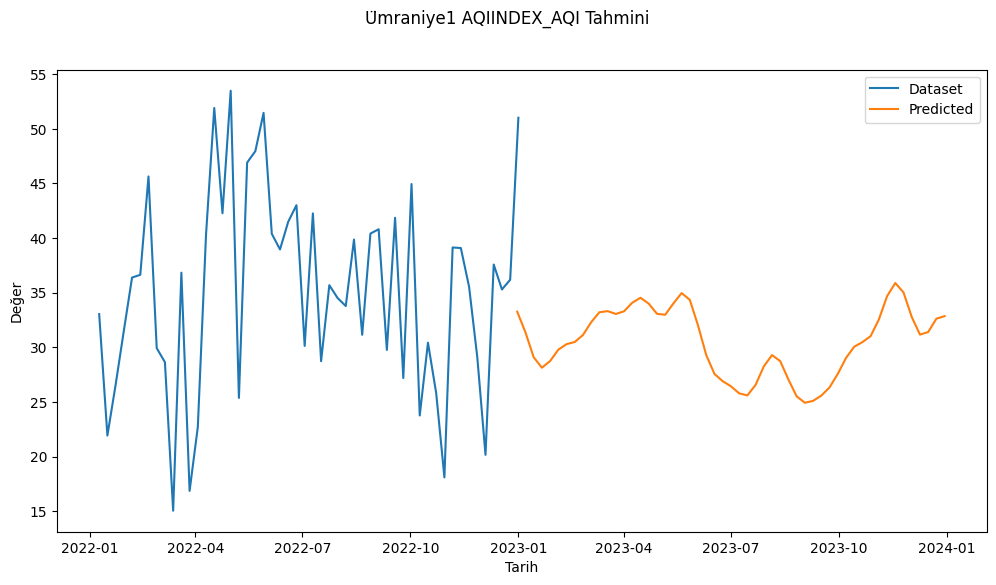

In [ ]:
predict_future("Ümraniye1","AQIINDEX_AQI")

In [ ]:
def predict_future2(ilce,param,sekil):
    """
    girilen ilçenin girilen parametresini 2023 yılı için haftalık tahminler, güven aralığı ile birlikte görselleştirir.
    """

    ilce = unicodedata.normalize('NFKD', ilce)
    param = unicodedata.normalize('NFKD', param)
    dataset = dfs[ilce]
    dataset['ds'] = pd.to_datetime(dataset['ReadTime'], format='%Y-%m-%dT%H:%M:%S')
    dataset['y'] = dataset[param]
    dataset = dataset[['ds','y']]
    dataset.set_index('ds', inplace=True)
    dataset = dataset.resample('W').mean()
    dataset = dataset.reset_index()

    m = Prophet()
    m.fit(dataset)

    start_date = datetime(2022, 12, 31)
    end_date = datetime(2023, 12, 31)
    current_date = start_date
    time_intervals = []

    while current_date < end_date:
      time_intervals.append(current_date)
      current_date += timedelta(days=7)

    future = pd.DataFrame({'ds': time_intervals})
    forecast = m.predict(future)
    pred = forecast["yhat"]
    pred_upper = forecast["yhat_upper"]
    pred_lower = forecast["yhat_lower"]

    fig, ax = plt.subplots(figsize = (10,6))
    ax.fill_between(forecast["ds"], pred_upper, pred_lower, alpha=0.2, label='Tahmin aralığı')
    plt.plot(dataset["ds"].tail(52), dataset["y"].tail(52), label='Dataset')
    ax.plot(forecast["ds"], pred, label='Tahminler')

    ax.plot(forecast["ds"],pred_lower.tail(53), label='Alt sınır')
    ax.plot(forecast["ds"],pred_upper.tail(53),label='Üst Sınr')

    plt.suptitle(f"Şekil {sekil} {ilce} İstasyonu 2023  Tahmini")
    plt.xlabel("Tarih")
    plt.ylabel("Değer")
    plt.legend()


    folder_path = '2023_Tahmin2'
    os.makedirs(folder_path, exist_ok=True)
    plt.savefig(os.path.join(folder_path, ilce+'.png'))
    plt.show()



INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/0bff650m.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/js35nkda.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22529', 'data', 'file=/tmp/tmprp53u2s9/0bff650m.json', 'init=/tmp/tmprp53u2s9/js35nkda.json', 'output', 'file=/tmp/tmprp53u2s9/prophet_model_24aiqsy/prophet_model-20230719172134.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:21:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:21:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


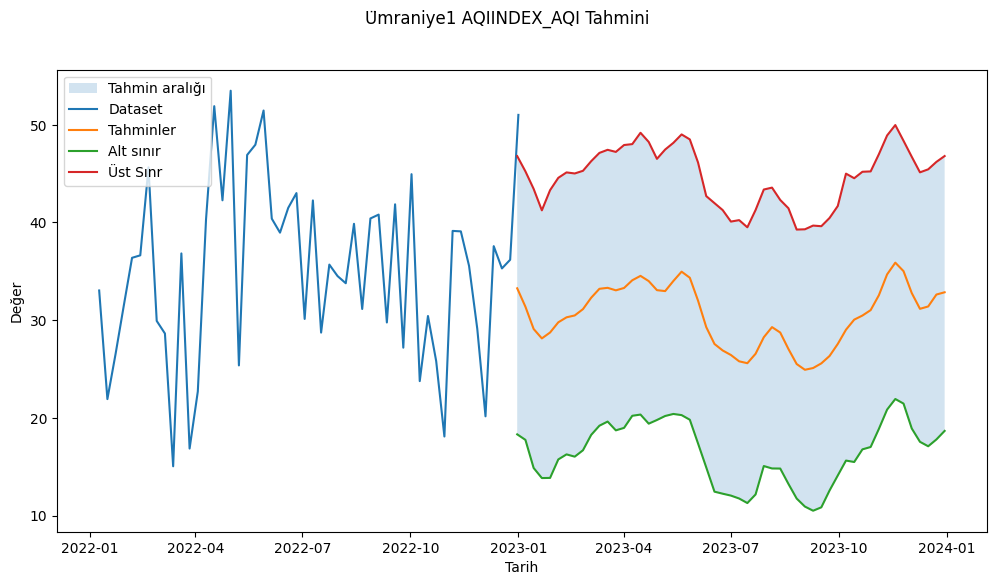

In [ ]:
predict_future2("Ümraniye1","AQIINDEX_AQI")

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/xk545b30.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/fzj1w1g0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80994', 'data', 'file=/tmp/tmprp53u2s9/xk545b30.json', 'init=/tmp/tmprp53u2s9/fzj1w1g0.json', 'output', 'file=/tmp/tmprp53u2s9/prophet_modelx734a72u/prophet_model-20230719181930.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:19:30 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:19:30 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


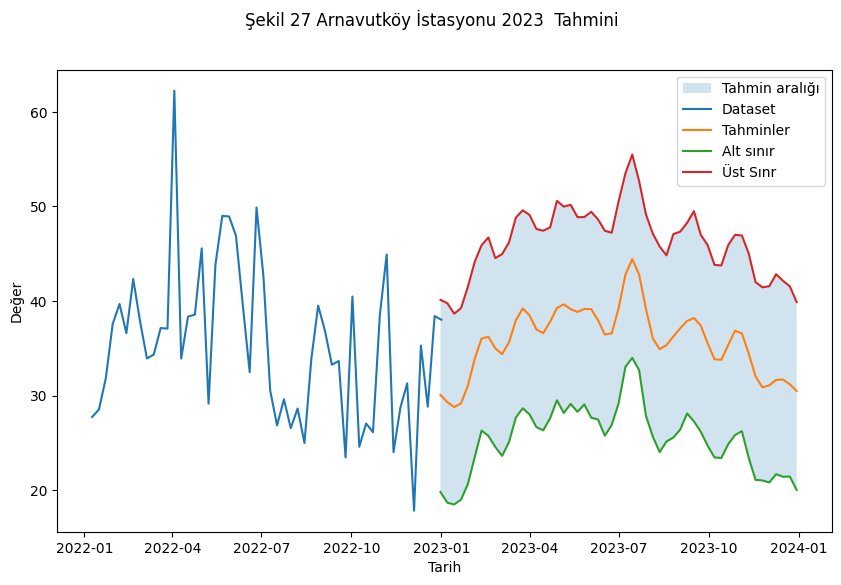

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/ft88ff7e.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/fhulnxkq.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=21082', 'data', 'file=/tmp/tmprp53u2s9/ft88ff7e.json', 'init=/tmp/tmprp53u2s9/fhulnxkq.json', 'output', 'file=/tmp/tmprp53u2s9/prophet_modelsnj4rfsc/prophet_model-20230719181931.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:19:31 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:19:31 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


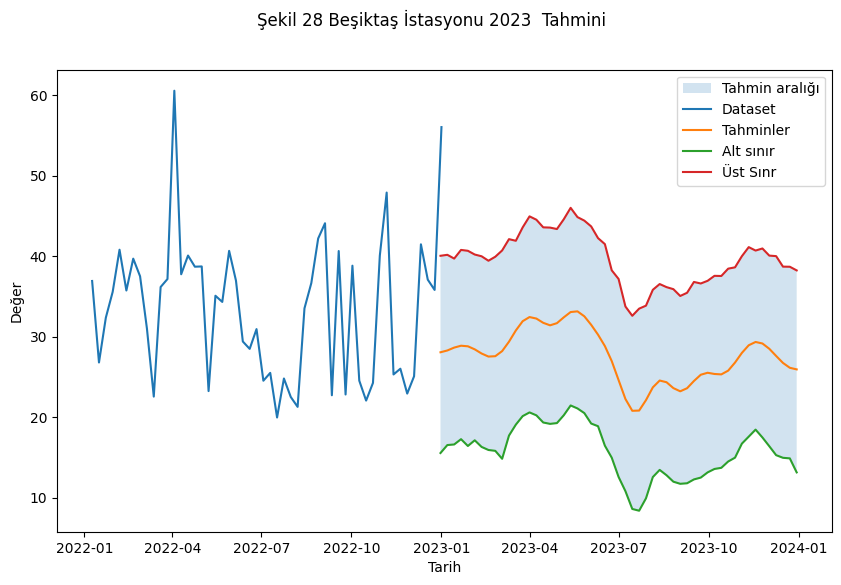

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/oczck7ws.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/dzj21bwz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=13349', 'data', 'file=/tmp/tmprp53u2s9/oczck7ws.json', 'init=/tmp/tmprp53u2s9/dzj21bwz.json', 'output', 'file=/tmp/tmprp53u2s9/prophet_modeli8b83wq9/prophet_model-20230719181932.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:19:32 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:19:32 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


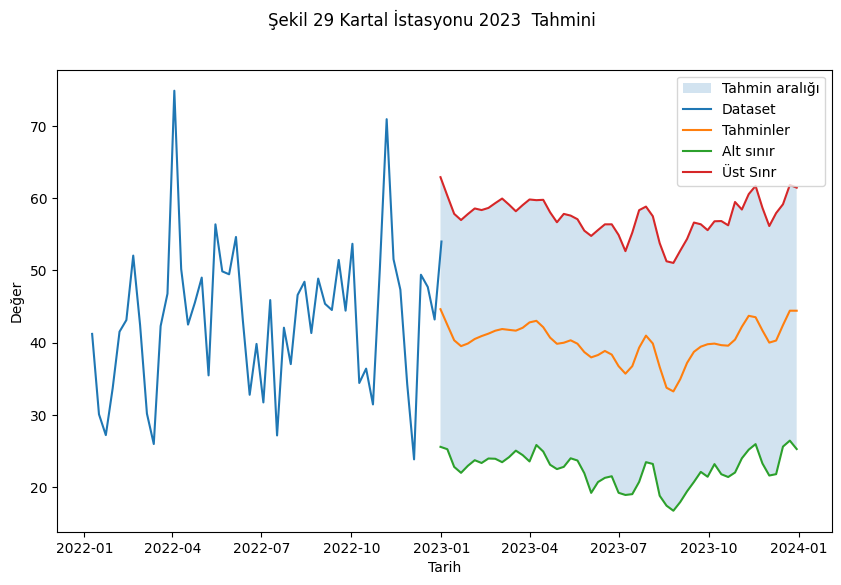

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/9mlccsl6.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/ui97wmv5.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29338', 'data', 'file=/tmp/tmprp53u2s9/9mlccsl6.json', 'init=/tmp/tmprp53u2s9/ui97wmv5.json', 'output', 'file=/tmp/tmprp53u2s9/prophet_modelldi1xg5f/prophet_model-20230719181933.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:19:33 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:19:33 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


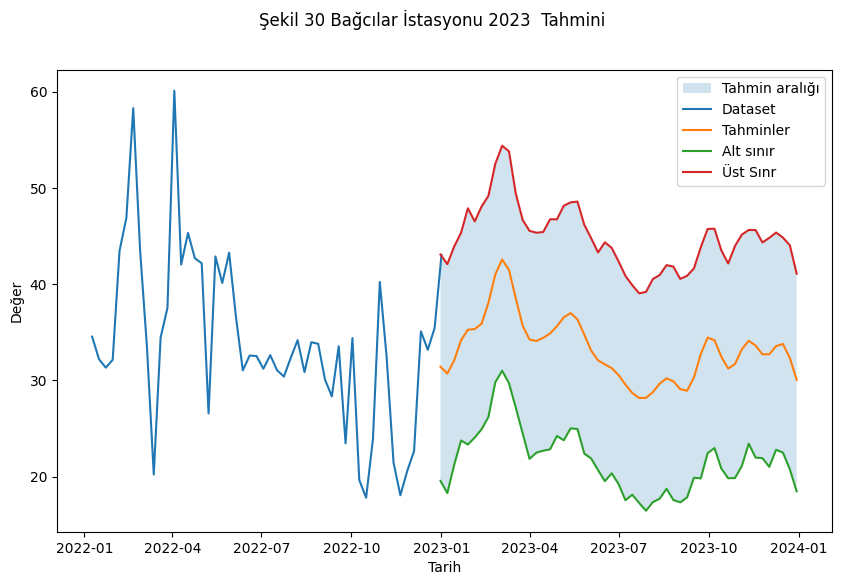

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/_u4mpfbf.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/rlzrojl8.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27191', 'data', 'file=/tmp/tmprp53u2s9/_u4mpfbf.json', 'init=/tmp/tmprp53u2s9/rlzrojl8.json', 'output', 'file=/tmp/tmprp53u2s9/prophet_model20yiwwio/prophet_model-20230719181934.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:19:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:19:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


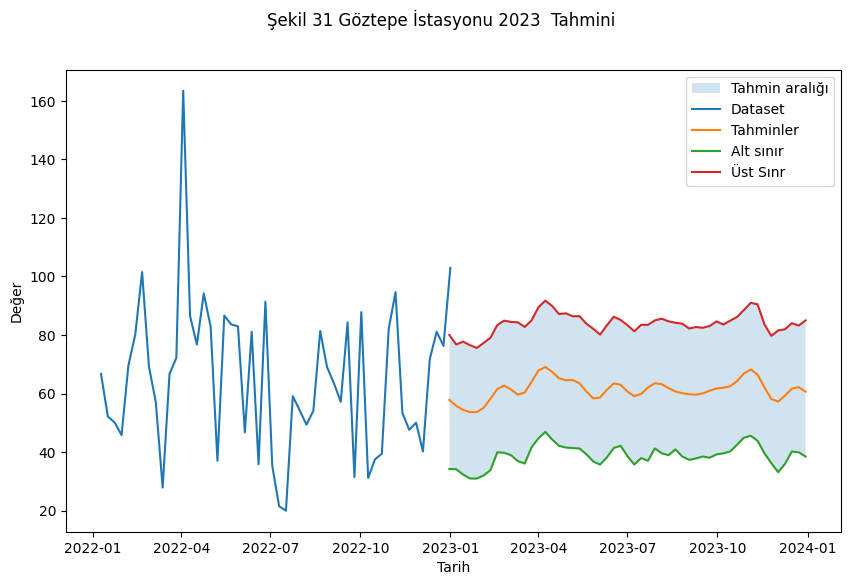

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/boi1s4j1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/6_9k4ha9.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41915', 'data', 'file=/tmp/tmprp53u2s9/boi1s4j1.json', 'init=/tmp/tmprp53u2s9/6_9k4ha9.json', 'output', 'file=/tmp/tmprp53u2s9/prophet_modelzqmip69c/prophet_model-20230719181935.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:19:35 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:19:35 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


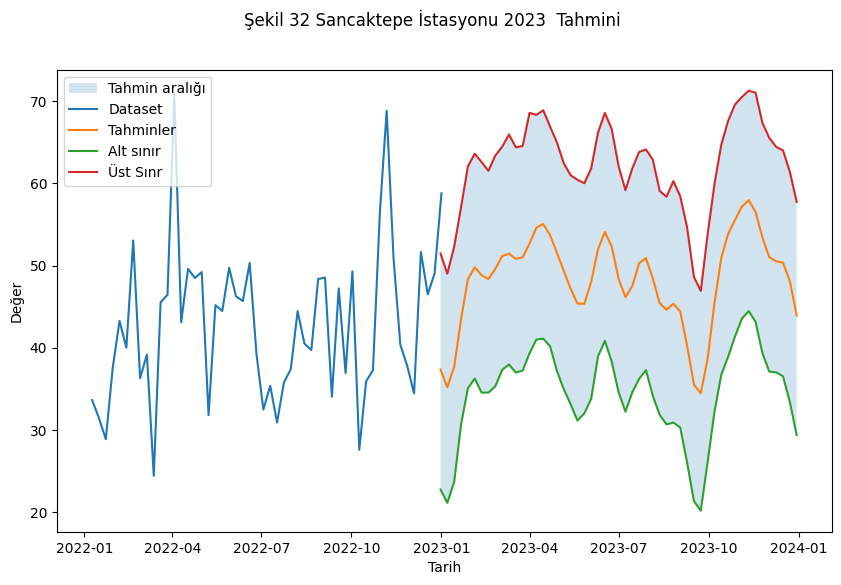

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/y7ov0sf2.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/pci_56t1.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=59634', 'data', 'file=/tmp/tmprp53u2s9/y7ov0sf2.json', 'init=/tmp/tmprp53u2s9/pci_56t1.json', 'output', 'file=/tmp/tmprp53u2s9/prophet_modelnhnxlhyl/prophet_model-20230719181936.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:19:36 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:19:36 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


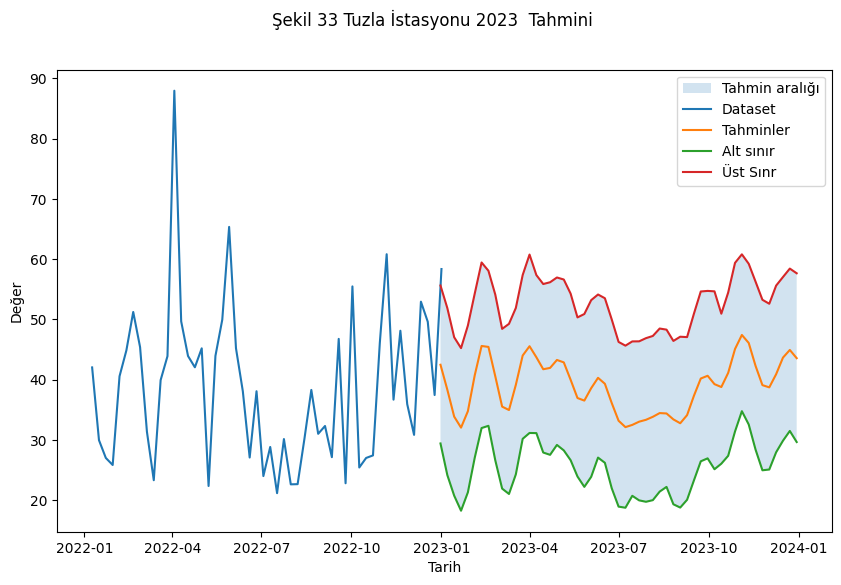

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/3d_mhh0l.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/1r_lnzi2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26086', 'data', 'file=/tmp/tmprp53u2s9/3d_mhh0l.json', 'init=/tmp/tmprp53u2s9/1r_lnzi2.json', 'output', 'file=/tmp/tmprp53u2s9/prophet_model8ph8kfz0/prophet_model-20230719181937.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:19:37 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:19:37 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


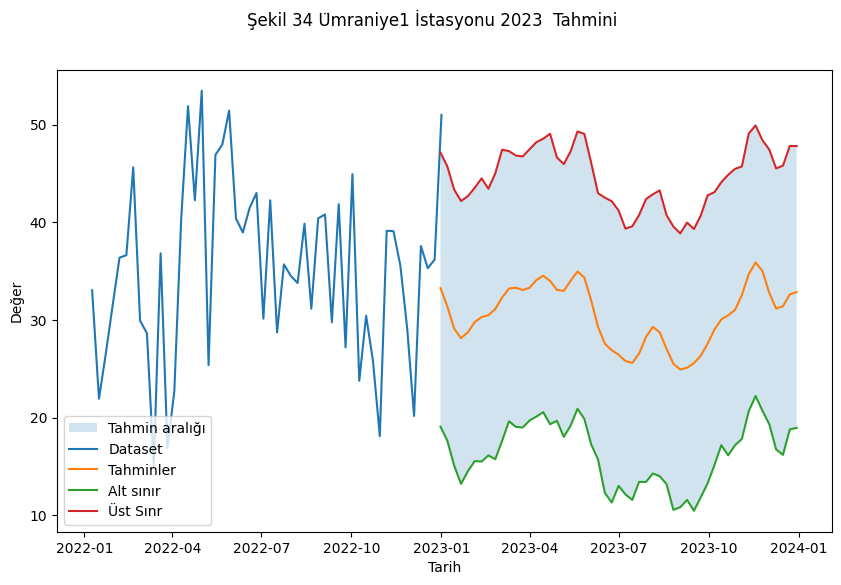

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/a86zrh40.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/ek2xsg50.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=40211', 'data', 'file=/tmp/tmprp53u2s9/a86zrh40.json', 'init=/tmp/tmprp53u2s9/ek2xsg50.json', 'output', 'file=/tmp/tmprp53u2s9/prophet_model2yh85v95/prophet_model-20230719181938.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:19:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:19:38 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


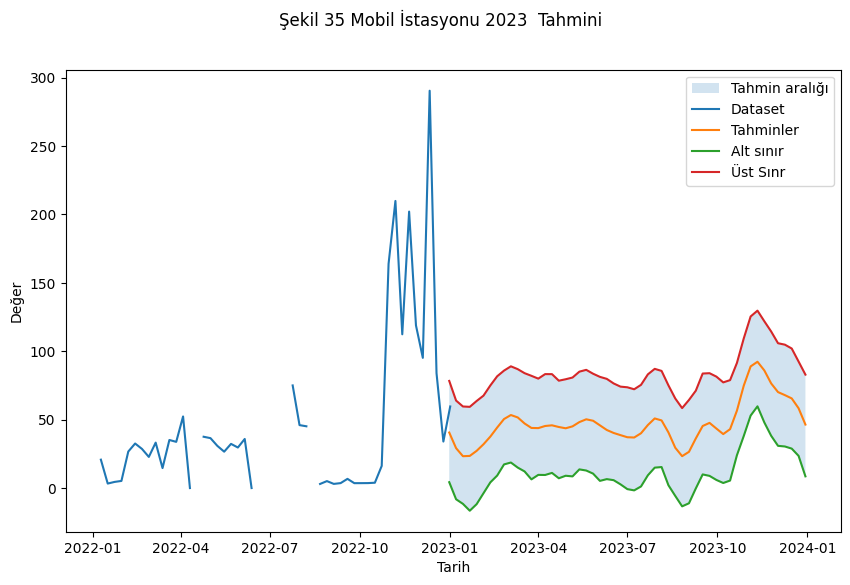

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/okd_lqce.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/tli_csfe.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29969', 'data', 'file=/tmp/tmprp53u2s9/okd_lqce.json', 'init=/tmp/tmprp53u2s9/tli_csfe.json', 'output', 'file=/tmp/tmprp53u2s9/prophet_modelngkshz1n/prophet_model-20230719181938.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:19:38 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:19:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


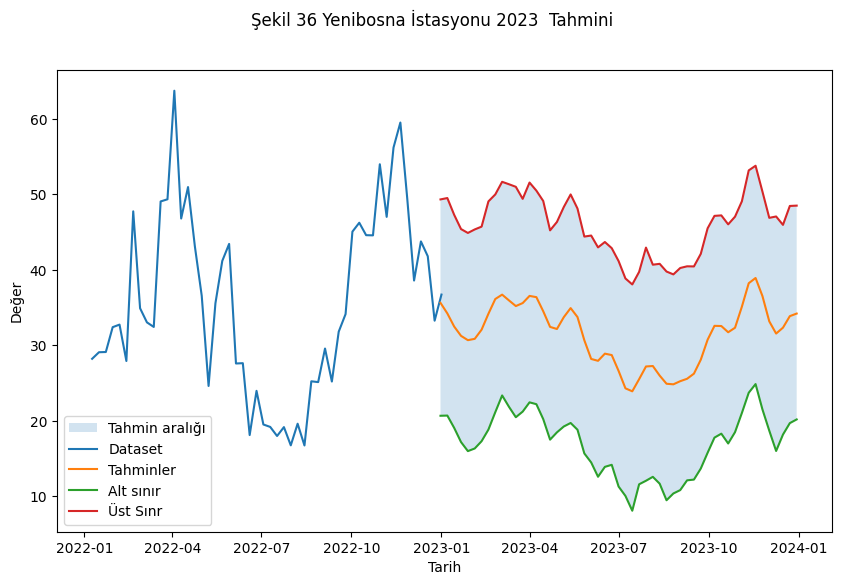

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/30alrdgd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/2dl4d4ql.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52049', 'data', 'file=/tmp/tmprp53u2s9/30alrdgd.json', 'init=/tmp/tmprp53u2s9/2dl4d4ql.json', 'output', 'file=/tmp/tmprp53u2s9/prophet_modelnla1_3nm/prophet_model-20230719181939.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:19:39 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:19:39 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


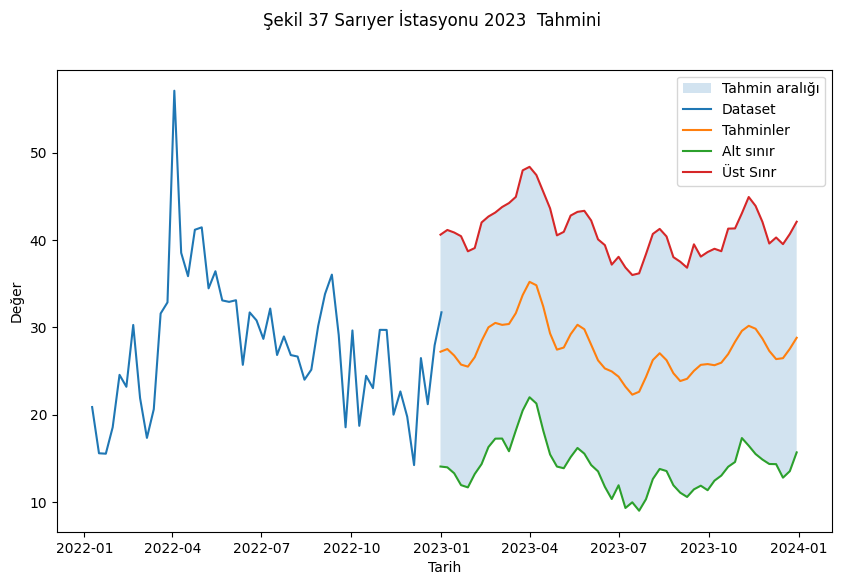

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/d5fx_c4g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/t0m0e7cb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41673', 'data', 'file=/tmp/tmprp53u2s9/d5fx_c4g.json', 'init=/tmp/tmprp53u2s9/t0m0e7cb.json', 'output', 'file=/tmp/tmprp53u2s9/prophet_model4vf7440o/prophet_model-20230719181940.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:19:40 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:19:40 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


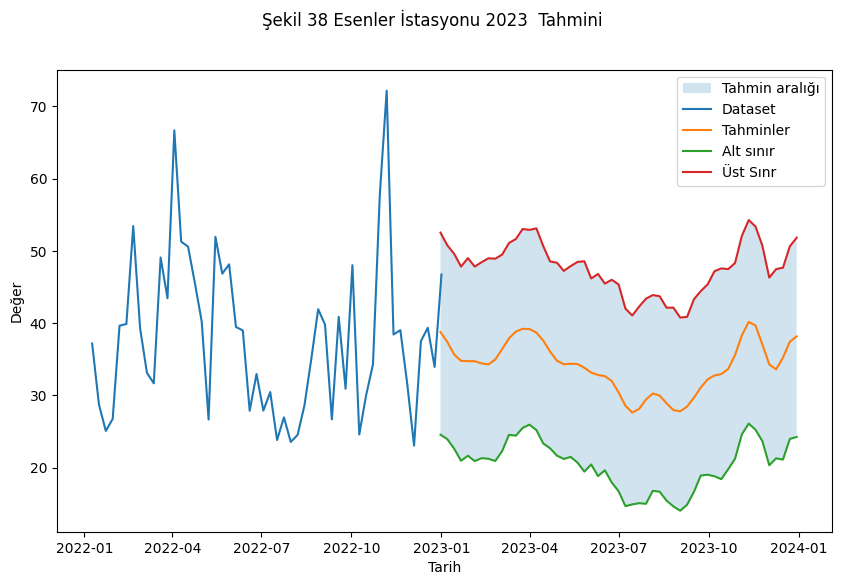

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/0yy6tws1.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/n_89gm1c.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=82901', 'data', 'file=/tmp/tmprp53u2s9/0yy6tws1.json', 'init=/tmp/tmprp53u2s9/n_89gm1c.json', 'output', 'file=/tmp/tmprp53u2s9/prophet_modelmpdjl5l5/prophet_model-20230719181941.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:19:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:19:41 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


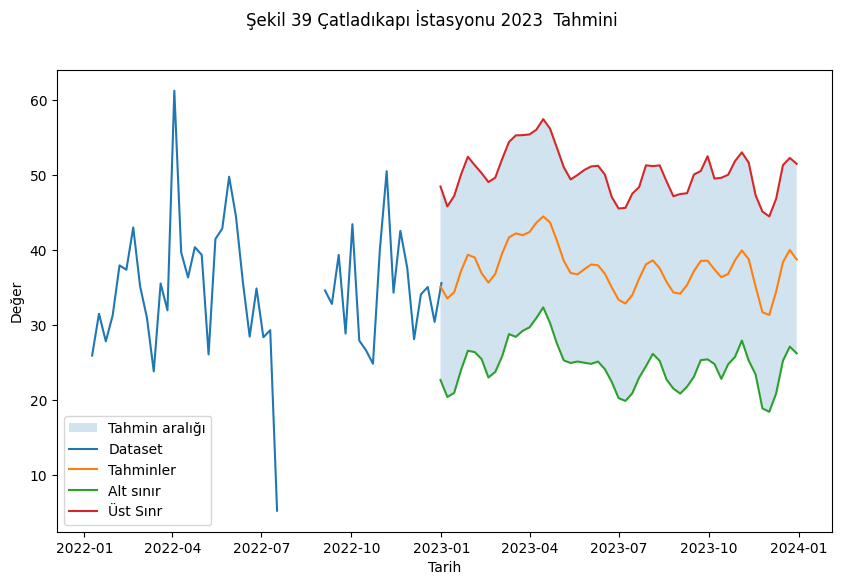

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/67n4y1ff.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/vpw4qiqg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=47443', 'data', 'file=/tmp/tmprp53u2s9/67n4y1ff.json', 'init=/tmp/tmprp53u2s9/vpw4qiqg.json', 'output', 'file=/tmp/tmprp53u2s9/prophet_modelpyj3pffx/prophet_model-20230719181942.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:19:42 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:19:42 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


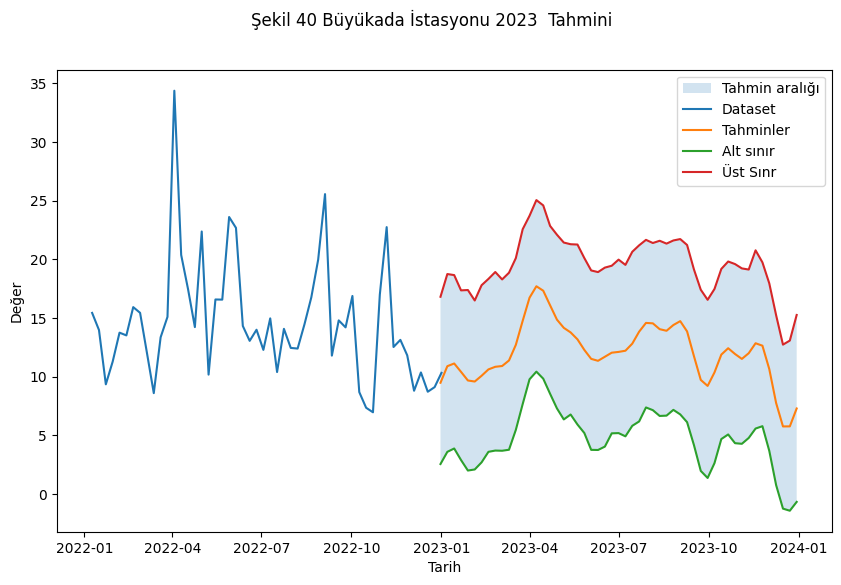

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/ctip01ag.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/d3tkf79_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=33754', 'data', 'file=/tmp/tmprp53u2s9/ctip01ag.json', 'init=/tmp/tmprp53u2s9/d3tkf79_.json', 'output', 'file=/tmp/tmprp53u2s9/prophet_model6okydit2/prophet_model-20230719181943.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:19:43 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:19:43 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


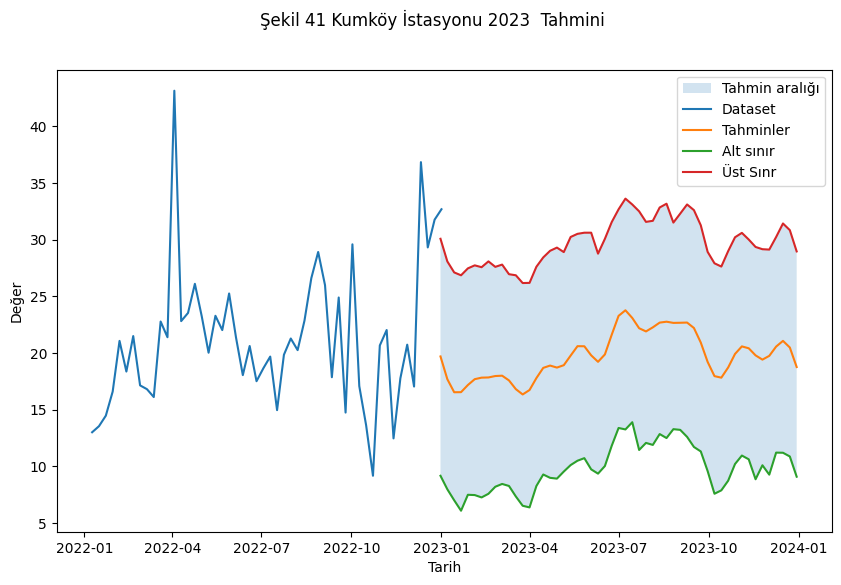

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/su8ngswy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/u3pev3g4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=70661', 'data', 'file=/tmp/tmprp53u2s9/su8ngswy.json', 'init=/tmp/tmprp53u2s9/u3pev3g4.json', 'output', 'file=/tmp/tmprp53u2s9/prophet_modelopbp6a_h/prophet_model-20230719181945.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:19:45 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:19:45 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


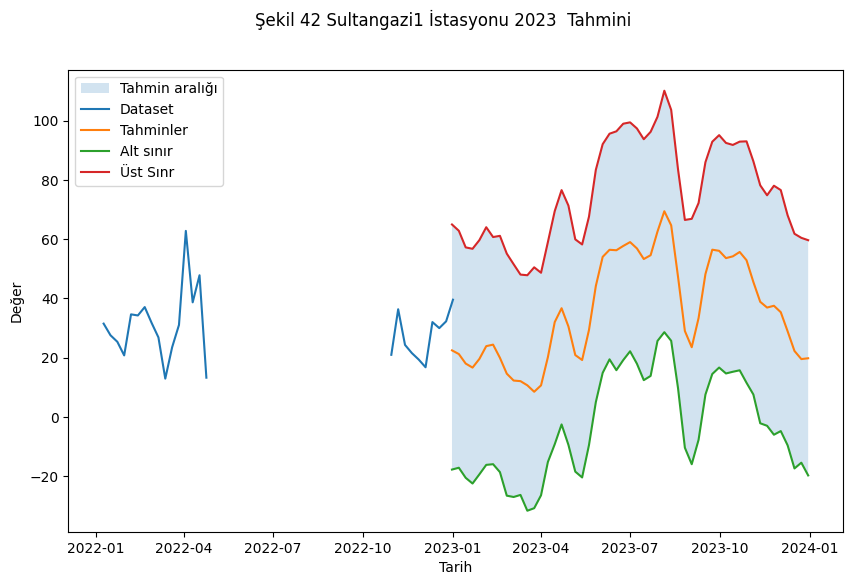

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/0bvfnxij.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/exr93efa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87145', 'data', 'file=/tmp/tmprp53u2s9/0bvfnxij.json', 'init=/tmp/tmprp53u2s9/exr93efa.json', 'output', 'file=/tmp/tmprp53u2s9/prophet_modeltrlb0k74/prophet_model-20230719181946.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:19:46 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:19:46 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


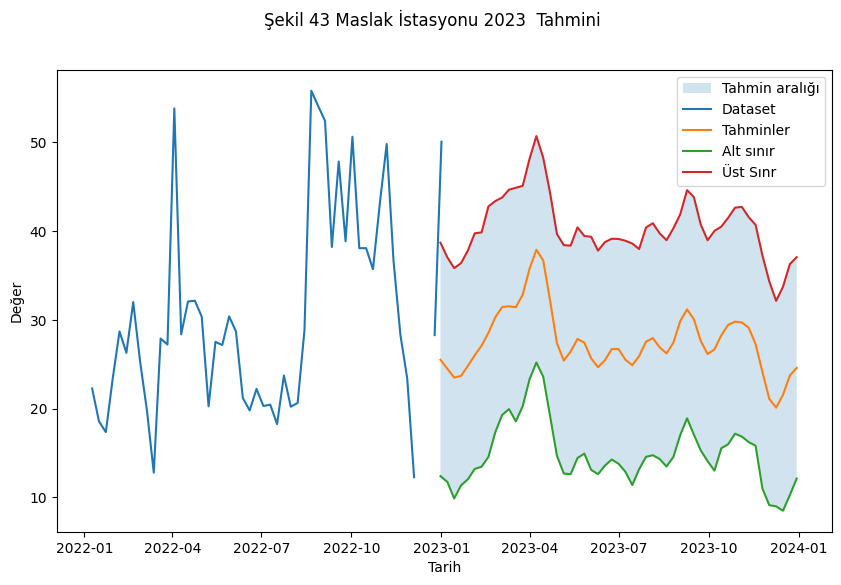

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/tz_875f9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/k1y8ioqh.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=62408', 'data', 'file=/tmp/tmprp53u2s9/tz_875f9.json', 'init=/tmp/tmprp53u2s9/k1y8ioqh.json', 'output', 'file=/tmp/tmprp53u2s9/prophet_modelqmzmmoc8/prophet_model-20230719181947.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:19:47 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:19:47 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


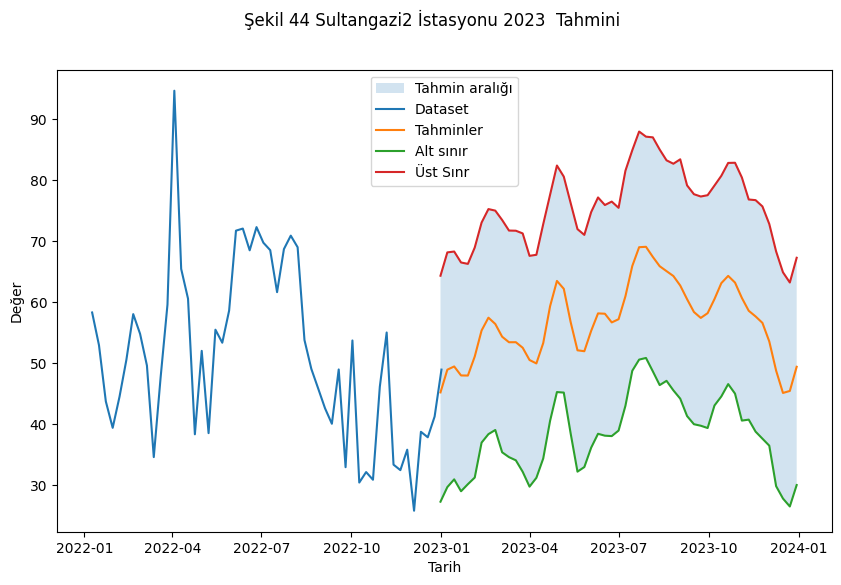

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/vazbez3t.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/lle67kz_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89884', 'data', 'file=/tmp/tmprp53u2s9/vazbez3t.json', 'init=/tmp/tmprp53u2s9/lle67kz_.json', 'output', 'file=/tmp/tmprp53u2s9/prophet_model6b5o3yss/prophet_model-20230719181948.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:19:48 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:19:48 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


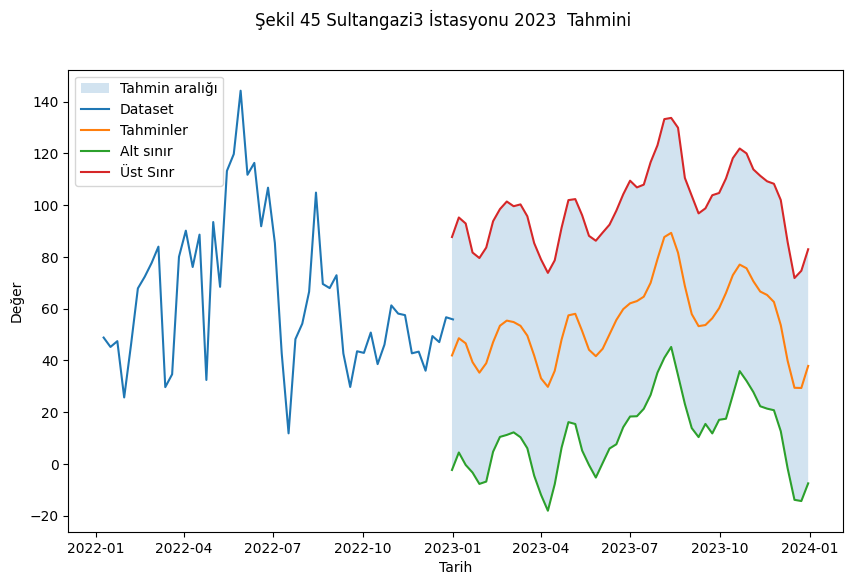

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/iaxe53xy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/wu_vmc77.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=32190', 'data', 'file=/tmp/tmprp53u2s9/iaxe53xy.json', 'init=/tmp/tmprp53u2s9/wu_vmc77.json', 'output', 'file=/tmp/tmprp53u2s9/prophet_modelhe9kqov0/prophet_model-20230719181949.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:19:49 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:19:49 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


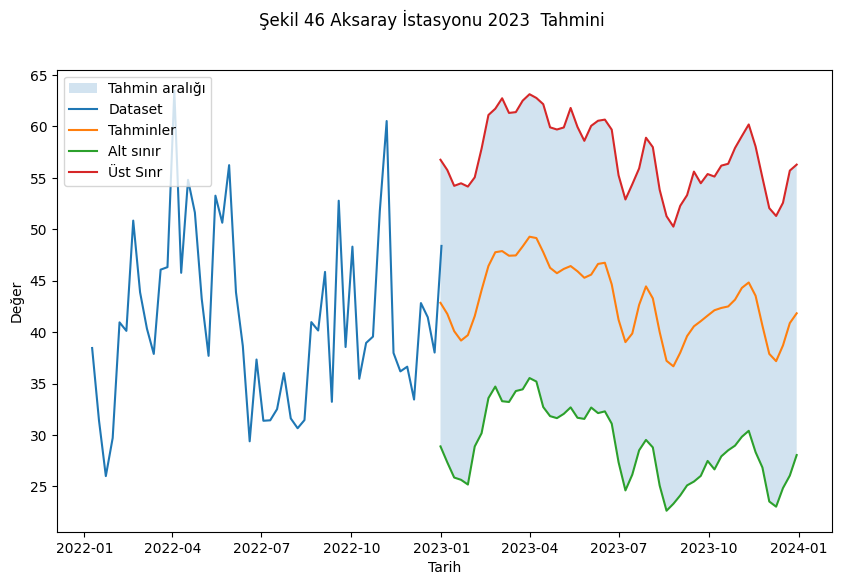

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/u14zgyf4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/uvsh_wq4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75312', 'data', 'file=/tmp/tmprp53u2s9/u14zgyf4.json', 'init=/tmp/tmprp53u2s9/uvsh_wq4.json', 'output', 'file=/tmp/tmprp53u2s9/prophet_modellkbvvvml/prophet_model-20230719181950.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:19:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:19:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


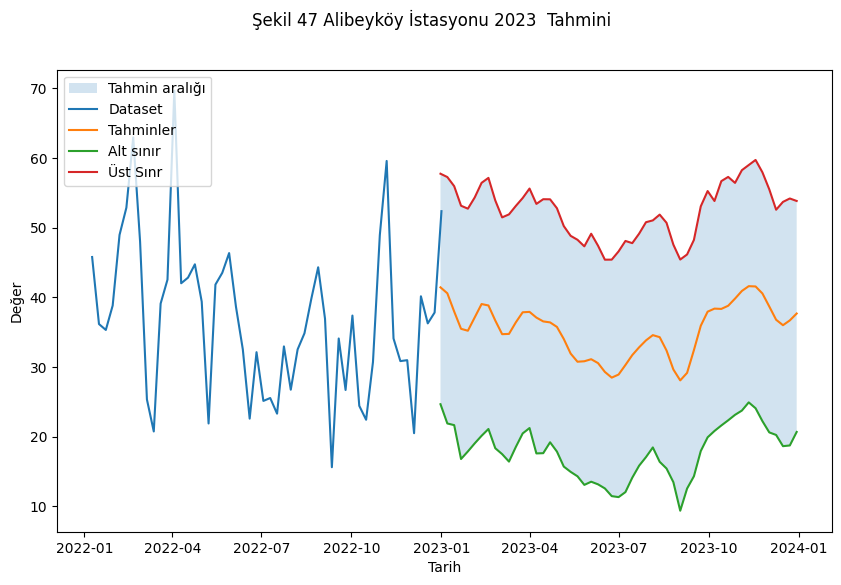

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/lgchvsee.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/mtr3p1ie.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=52300', 'data', 'file=/tmp/tmprp53u2s9/lgchvsee.json', 'init=/tmp/tmprp53u2s9/mtr3p1ie.json', 'output', 'file=/tmp/tmprp53u2s9/prophet_modelks3wkisf/prophet_model-20230719181951.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:19:51 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:19:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


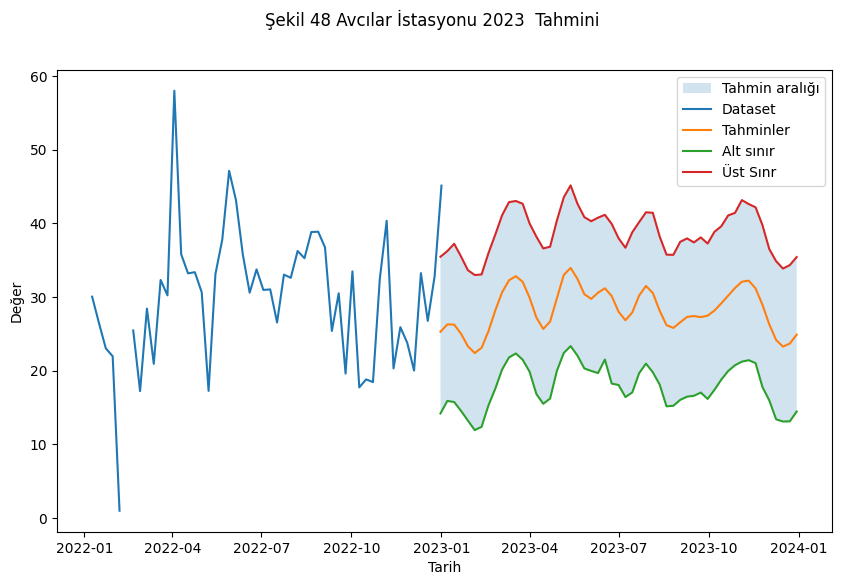

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/0cq991em.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/4dfp6hgk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=95352', 'data', 'file=/tmp/tmprp53u2s9/0cq991em.json', 'init=/tmp/tmprp53u2s9/4dfp6hgk.json', 'output', 'file=/tmp/tmprp53u2s9/prophet_model0141l5mo/prophet_model-20230719181952.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:19:52 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:19:52 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


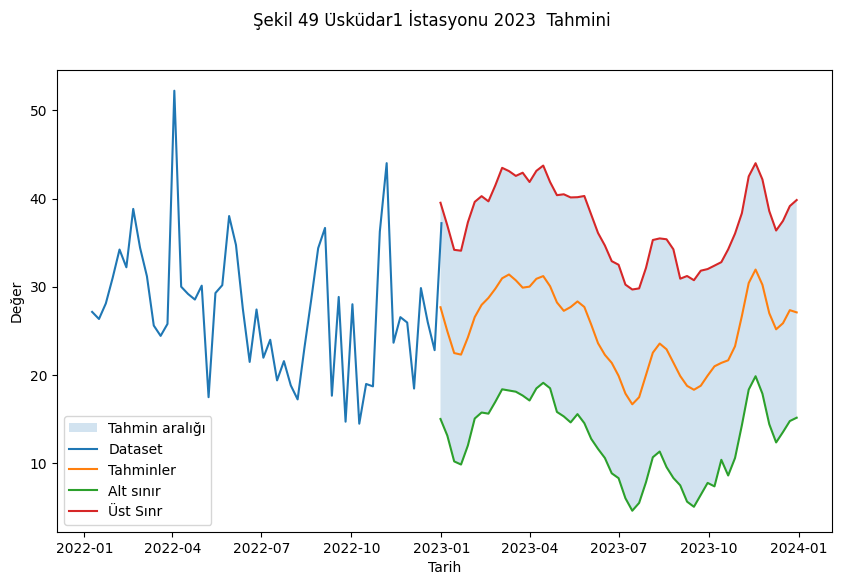

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/s7lisb7i.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/_8yekmip.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=41049', 'data', 'file=/tmp/tmprp53u2s9/s7lisb7i.json', 'init=/tmp/tmprp53u2s9/_8yekmip.json', 'output', 'file=/tmp/tmprp53u2s9/prophet_models1us0ncz/prophet_model-20230719181953.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:19:53 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:19:53 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


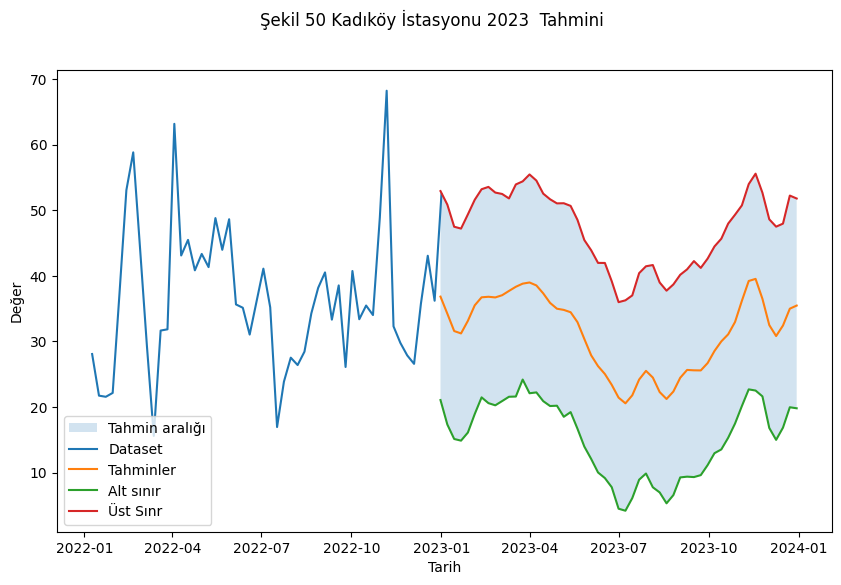

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/egm5baic.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/jtfonx00.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=11401', 'data', 'file=/tmp/tmprp53u2s9/egm5baic.json', 'init=/tmp/tmprp53u2s9/jtfonx00.json', 'output', 'file=/tmp/tmprp53u2s9/prophet_modelpevxw6db/prophet_model-20230719181954.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:19:54 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:19:54 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


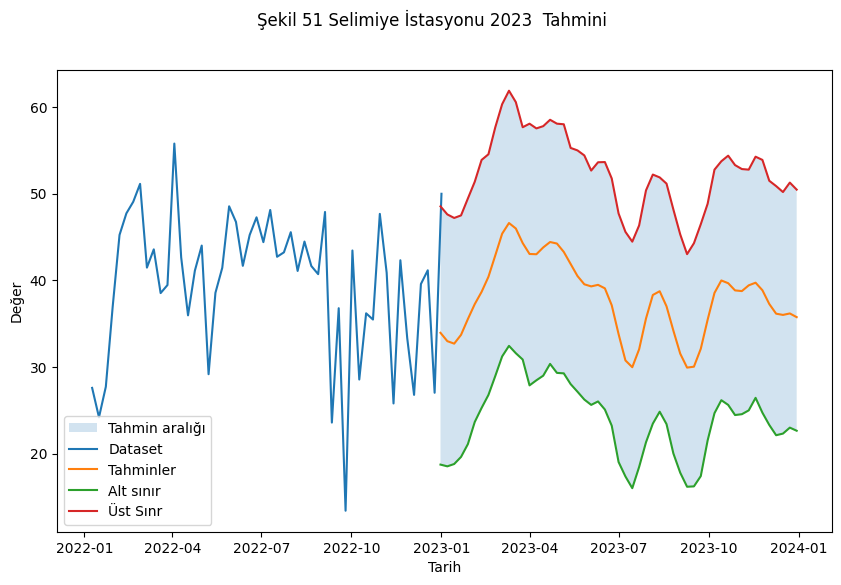

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/718paa36.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/dgmmfmfz.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80579', 'data', 'file=/tmp/tmprp53u2s9/718paa36.json', 'init=/tmp/tmprp53u2s9/dgmmfmfz.json', 'output', 'file=/tmp/tmprp53u2s9/prophet_modelzm1dypym/prophet_model-20230719181955.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:19:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:19:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


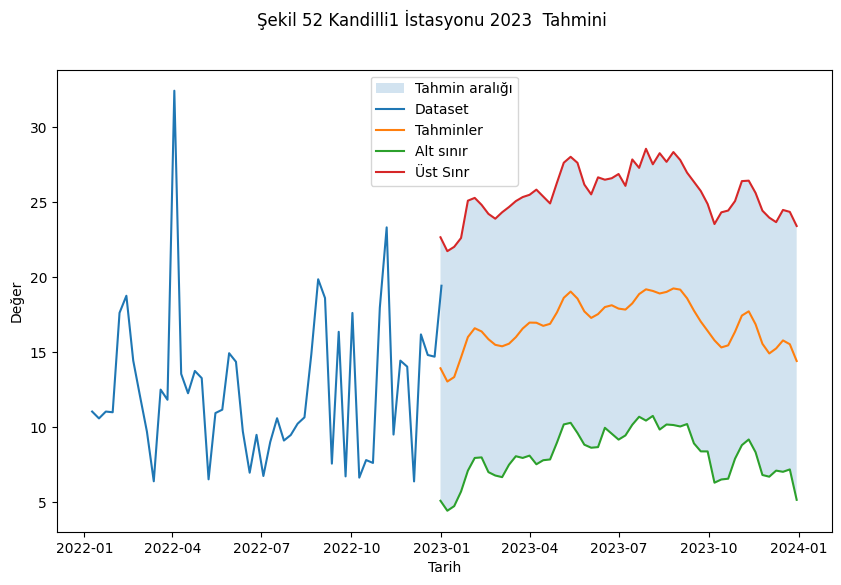

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/vm7tpolp.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/_eu6l9fg.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=86052', 'data', 'file=/tmp/tmprp53u2s9/vm7tpolp.json', 'init=/tmp/tmprp53u2s9/_eu6l9fg.json', 'output', 'file=/tmp/tmprp53u2s9/prophet_modelo6iec_db/prophet_model-20230719181956.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:19:56 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:19:56 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


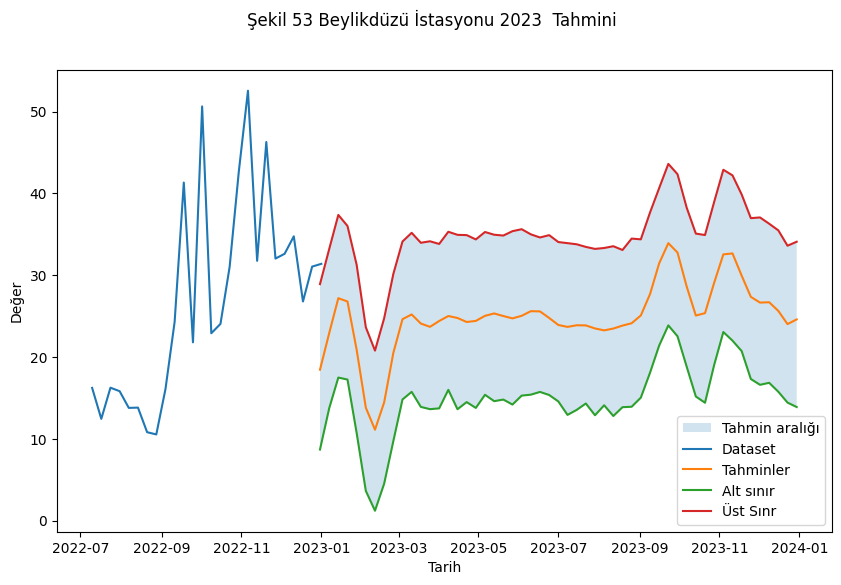

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/grngl8nl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmprp53u2s9/3ya6sqol.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=2015', 'data', 'file=/tmp/tmprp53u2s9/grngl8nl.json', 'init=/tmp/tmprp53u2s9/3ya6sqol.json', 'output', 'file=/tmp/tmprp53u2s9/prophet_model0sg1hpdk/prophet_model-20230719181957.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
18:19:57 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
18:19:57 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


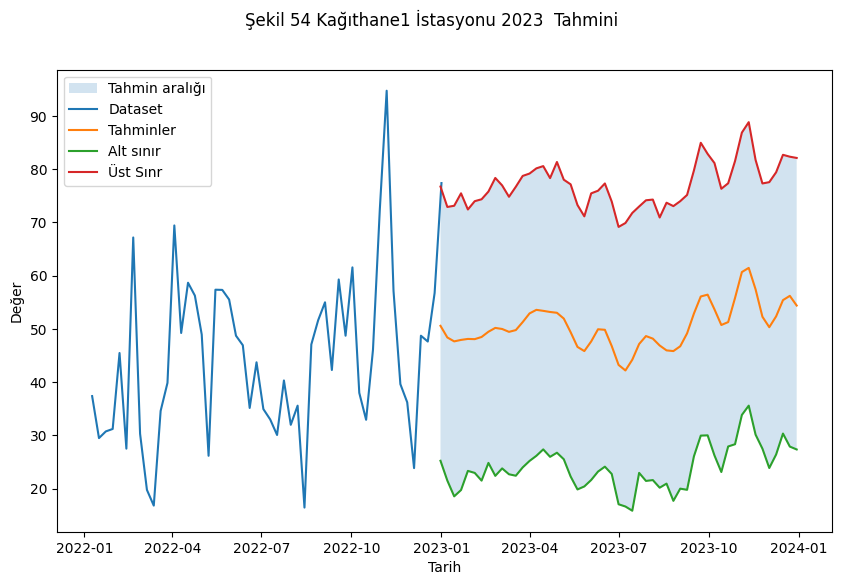

In [ ]:
#tüm içeler için tahmin sonuçlarını klasöre kaydeder.
sekil = 27
for i in dfs.keys():
  try:
    predict_future2(i,"AQIINDEX_AQI",sekil = sekil)
    sekil +=1
  except:
    pass
